<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/DeepNetWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Problème 1] Classification des couches entièrement connectées

In [8]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : インスタンス
        初期化方法のインスタンス
    optimizer : インスタンス
        最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

    
    def forward(self, Z1):
        self.Z = Z1.copy()
        Z2 = np.dot(Z1, self.W) + self.B
        
        return Z2
    
    
    def backward(self, dA):
        self.dB = dA 
        self.dW = np.dot(self.Z.T, dA) 
        dZ = np.dot(dA, self.W.T) 
        
        self = self.optimizer.update(self)
        
        return dZ


#[Problème 2] Classer la méthode d'initialisation

In [24]:
class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution
    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W :
        """
        W=self.sigma * np.random.randn(n_nodes1, n_nodes2) 
        pass
        return W
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B :
        """
        B=np.zeros(n_nodes2)
        pass
        return B

#[Problème 3] Classer les méthodes d'optimisation

In [25]:
class SGD:
    """
    Stochastic gradient descent
    Parameters
    ----------
    lr : Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        Update weights and biases for a layer
        Parameters
        ----------
        layer : Instance of the layer before update
        """
        ## layer.dB=partial derivatives of loss
        layer.W -= self.lr* layer.dW / layer.dB.shape[0] #(n_nodes1, n_nodes2)
        layer.B -= self.lr* layer.dB.mean(axis=0) #(n_nodes2)

#[Problème 4] Classer les fonctions d'activation

In [26]:
class Softmax:
    def __init__(self):
        self.Z = None
    
    
    def forward(self, A):
        c = np.max(A)
        exp_A = np.exp(A - c)
        sum_exp_A = np.sum(exp_A, axis=1).reshape(-1, 1)

        self.Z = exp_A / sum_exp_A
        
        return self.Z

    
    def backward(self, y):
        loss_sum = np.sum(y * np.log(self.Z), axis=1)
        loss = -np.mean(loss_sum)
        
        dA = self.Z - y
        
        return dA, loss

In [27]:
class Sigmoid:
    def __init__(self):
        self.Z = None 
    def forward(self, A):
        self.Z = 1 / (1 + np.exp(-A))
        return self.Z
    def backward(self, dZ):
        dA = dZ * (1 - self.Z) * self.Z
        return dA

In [28]:
class Tanh:
    def __init__(self):
        self.Z = None
    
    def forward(self, A):
        self.Z =  np.tanh(A)
        
        return  self.Z
    
    def backward(self, dZ):
        dA = dZ * (1 - self.Z**2)
        
        return dA

#[Problem 5] ReLU class creation

In [29]:
class Relu:
    def __init__(self):
        self.X = None
    def forward(self, A):
        self.X = A.copy()
        Z = np.maximum(0, A)
        return Z
    def backward(self, dZ):
        dA = np.where(self.X > 0, dZ, 0)
        return dA

#[Problem 6] Initial value of weight

In [30]:
class XavierInitializer:
    def __init__(self):
        pass
        

    def W(self, n_nodes1, n_nodes2):
        W = np.random.randn(n_nodes1, n_nodes2) / np.sqrt(n_nodes1)
        return W
    
    
    def B(self, n_nodes2):
        B = np.zeros(n_nodes2) #(n_nodes2)
        return B

In [31]:
class HeInitializer:
    def __init__(self):
        pass
        
    def W(self, n_nodes1, n_nodes2):
        W = np.random.randn(n_nodes1, n_nodes2) * np.sqrt(2 / n_nodes1)
    
        return W
    
    def B(self, n_nodes2):
        B = np.zeros(n_nodes2) 
        
        return B

#[Problem 7] Optimization method

In [32]:
class AdaGrad:
    def __init__(self, lr):
        self.lr = lr 
        self.H_W= None 
        self.H_B = None

    def update(self, layer):
        if self.H_W is None:
            self.H_W = np.zeros(layer.W.shape)
        if self.H_B is None:
            self.H_B = np.zeros(layer.B.shape)
        
        self.H_W += (layer.dW / layer.dB.shape[0]) ** 2 
        self.H_B += (layer.dB.mean(axis=0)) **2
        layer.W -= self.alpha / np.sqrt(self.H_W + 1e-7) * layer.dW / layer.dB.shape[0] 
        layer.B -= self.alpha / np.sqrt(self.H_B + 1e-7) * layer.dB.mean(axis=0) 
        
        return layer

#[Problem 8] Class completion

In [41]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [47]:
class ScratchDeepNeuralNetrowkClassifier():
    """
    ニューラルネットワーク分類器

    Parameters
    --------------
    epoc : int
        エポック数
    activaiton : {'sigmoid', 'tanh', 'relu'} default 'relu'
        活性化関数の種類
    solver :  {'sgd', 'adagrad'}, default 'adam'
        最適化手法の種類
    lr : float
        学習率
    batch_size : int
        バッチサイズ
    initial : {'simple', 'xavier', 'he'} default 'he'
        重みの初期化方法
    sigma : float
        重みパラメータ(ガウス分布の標準偏差)
    n_nodes1 : int
        1層目の数
    n_nodes2 : int
        2層目の数
    n_output : int
        出力層の数
    verbose : bool
        学習過程の出力の有無
        
    Attributes
    -------------
    FC1 :  インスタンス
        結合層のインスタンス
    FC2 :   インスタンス
        結合層のインスタンス
    FC3 :   インスタンス
        結合層のインスタンス
    activation1 : インスタンス
        活性化関数のインスタンス
    activation2 : インスタンス
        活性化関数のインスタンス
    activation3 : インスタンス
        活性化関数のインスタンス
    loss_list : list
        学習用データのエポックごとの損失を記録するリスト
     mini_loss_list : list
        学習用データのイテレーションごとの損失を記録するリスト   
    val_loss_list : list
        検証用データのエポックごとの損失を記録するリスト
    mini_val_loss_list : list
        検証用データのイテレーションごとの損失を記録するリスト        
    """
    def __init__(self, epoc=20, activation='relu', solver='adagrad', lr=0.005,
                             batch_size=10, initial='he', sigma=0.01, n_nodes1=400, 
                             n_nodes2=200, verbose=True):
        self.epoc=epoc              
        self.activation= activation     
        self.solver= solver            
        self.lr= lr             
        self.batch_size = batch_size   
        self.initial = initial             
        self.sigma = sigma            
        self.n_nodes1= n_nodes1    
        self.n_nodes2= n_nodes2    
        self.verbose= verbose 
        self.val_is_true = False 
        self.FC1=None 
        self.FC2= None 
        self.FC3= None 
        self.activation1= None
        self.activation2= None
        self.activation3= None
        self.loss_list= None 
        self.mini_loss_list = None        
        self.val_loss_list= None
        self.mini_val_loss_list= None 
    
    def fit(self, X, y, X_val=None, y_val=None):
        if X.ndim == 1:
            X = X[:, np.newaxis]
        if y.ndim == 1:
            y = y[:, np.newaxis]
            
        n_output = np.unique(y).shape[0]
        y_onehot = self._one_hot(y, n_output)
        
        train_mini_batch = GetMiniBatch(X, y_onehot, self.batch_size)
 
        if X_val is not None and y_val is not None:
            
            if X.ndim == 1:
                X_val = X_val[:, np.newaxis]
            if y_val.ndim == 1:
                y_val = y_val[:, np.newaxis]

            y_val_onehot = self._one_hot(y_val, n_output) 
            test_mini_batch = GetMiniBatch(X_val, y_val_onehot)
        
        
        # Activation
        if self.activation == 'sigmoid':
            activate1 = Sigmoid()
            activate2 = Sigmoid()
        elif self.activation == 'tanh':
            activate1 = Tanh()
            activate2 = Tanh()
        elif self.activation == 'relu':
            activate1 = Relu()
            activate2 = Relu()
        
        #Optimisation
        if self.solver == 'sgd':
            optimizer1 = SGD(self.lr)
            optimizer2 = SGD(self.lr)
            optimizer3 = SGD(self.lr) 
        elif self.solver == 'adagrad':
            optimizer1 = AdaGrad(self.lr)
            optimizer2 = AdaGrad(self.lr)
            optimizer3 = AdaGrad(self.lr)
            
        #重みの初期化方法の選択
        if self.initial == 'simple':
            initializer1 = SimpleInitializer(self.sigma)
            initializer2 = SimpleInitializer(self.sigma)
            initializer3 = SimpleInitializer(self.sigma)
        elif self.initial == 'xavier':
            initializer1 = XavierInitializer()
            initializer2 = XavierInitializer()
            initializer3 = XavierInitializer()
        elif self.initial == 'he':
            initializer1 = HeInitializer()
            initializer2 = HeInitializer()
            initializer3 = HeInitializer()
        
        #結合層および活性化関数クラスのインスタンス化
        self.FC1 = FC(X.shape[1], self.n_nodes1, initializer1, optimizer1) #第1層
        self.activation1 = activate1
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, initializer2, optimizer2) #第2層
        self.activation2 = activate2
        self.FC3 = FC(self.n_nodes2, y_onehot.shape[1], initializer3, optimizer3) #第3層
        self.activation3 = Softmax()

        self.loss_list = []       
        self.val_loss_list= [] 
        for i in range(self.epoc):
            self.mini_loss_list = []
          
            for mini_X_train, mini_y_train in train_mini_batch:
                
                A1 = self.FC1.forward(mini_X_train) 
                Z1 = self.activation1.forward(A1)   
                A2 = self.FC2.forward(Z1)           
                Z2 = self.activation2.forward(A2)   
                A3 = self.FC3.forward(Z2)           
                Z3 = self.activation3.forward(A3)  

                dA3, mini_loss = self.activation3.backward(mini_y_train) 
                dZ2 = self.FC3.backward(dA3)         
                dA2 = self.activation2.backward(dZ2) 
                dZ1 = self.FC2.backward(dA2)         
                dA1 = self.activation1.backward(dZ1) 
                dZ0 = self.FC1.backward(dA1)          

                self.mini_loss_list.append(mini_loss)
                
            loss = np.mean(self.mini_loss_list)
            self.loss_list.append(loss)

        
            if X_val is not None and y_val is not None:
                self.val_is_true=True
                self.mini_val_loss_list = []
                for mini_X_val, mini_y_val in test_mini_batch:

                  
                    A1 = self.FC1.forward(mini_X_val)
                    Z1 = self.activation1.forward(A1)
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)
                    
                    
                    dA3, mini_val_loss = self.activation3.backward(mini_y_val) 
                    
                    #
                    self.mini_val_loss_list.append(mini_val_loss)

                val_loss = np.mean(self.mini_val_loss_list)
                self.val_loss_list.append(val_loss) 

            if self.verbose == True:
                print('Processus d\'apprentissage des données de formation' + str(i + 1) + 'epoc : ' + str(self.loss_list[i]))

                if X_val is not None or y_val is not None:
                    print('Processus d\'apprentissage des données de formation' + str(i + 1) + 'epoc : ' + str(self.val_loss_list[i]))
                    
                
    def predict(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        y_pred = self.activation3.forward(A3)
        
        return np.argmax(y_pred, axis=1)
            

    def _one_hot(self, y, n_output):
        one_hot = np.zeros((n_output, y.shape[0]))

        for idx, val in enumerate(y.astype(int)):
            one_hot[val, idx] = 1

        return one_hot.T
    

#[Problem 9] Learning and estimation

###  getting dataset

In [48]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

1.0
0.0
(48000, 784)
(12000, 784)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [49]:
model = ScratchDeepNeuralNetrowkClassifier(activation='relu', solver='sgd', initial='he',verbose=False)

model.fit(X_train, y_train, X_val, y_val)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


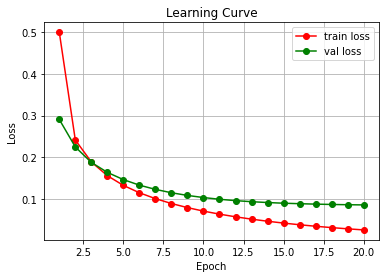

In [50]:
y_pred4= model.predict(X_test)
def plot_learning_curve(model):
        plt.plot(range(1, model.epoc + 1), model.loss_list, color="r", marker="o", label="train loss")
        if model.val_is_true:
            plt.plot(range(1, model.epoc + 1), model.val_loss_list, color="g", marker="o", label="val loss")
            
        plt.title("Learning Curve")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid()
        plt.legend(loc="best")
        plt.show()
plot_learning_curve(model)